In [12]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "2b-data"

 # Overfitting and Regularization

In the realm of predictive modeling, the pursuit of creating a model that perfectly fits the training data can inadvertently lead to a phenomenon known as overfitting. Overfitting occurs when a model becomes excessively complex, capturing not only the genuine patterns within the data but also the noise and random fluctuations present in the training set. 

The hyper-adaptation to the training data renders the model less capable of generalizing to new, unseen data, as it effectively memorizes the training examples rather than discerning meaningful relationships. As a result, an overfitted model may exhibit impressive performance on the training data but performs poorly when faced with real-world scenarios. The delicate balance between capturing essential patterns and avoiding the trap of overfitting underscores the importance of techniques like regularization, which aim to ensure model generalization by restraining excessive complexity.

There are three Regularization techniques we will be dealing with, all of which use the idea of penalizing terms to tackle overfitting.

But before we go any further, let's have a look at the data.

**Data Dictionary**

* Product_ID:- Unique identifier for each electronic device. <br>
* Product_Weight:- Weight of the device  <br>
* Energy_Efficiency:- Energy efficiency rating (e.g., "Energy Efficient", "Standard"). <br>
* Visibility_Index:- The % of the total display area of all products in a store allocated to the particular product <br>
* Product_Category:- Category of the electronic device (e.g., "Laptops", "Smartphones"). <br>
* Product_Price:- Price of the device in dollars<br>
* Store_ID:- Unique identifier for the store.<br>
* Store_Established_Year:- Number of years since the store was established.<br>
* Store_Size:- Size classification of the store (e.g., "Small", "Medium").<br>
* Location_Type:- The type of city in which the store is located<br>
* Store_Type:- Type of store (e.g., "Electronics Store Type1").<br>
* Sales_Performance:- Sales of the electronic device in the particular store. This is the outcome variable to be predicted.


## Visualizing the data

Let's visualize this all in the form of a Data Frame

In [13]:
data <- read.csv("/kaggle/input/2b-data/2b-data.csv")
head(data)


,Product_ID,Product_Weight,Energy_Efficiency,Visibility_Index,Product_Category,Product_Price,Store_ID,Store_Established_Year,Store_Size,Location_Type,Store_Type,Sales_Performance
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.300,Energy Efficient,0.01604730,Laptops,249.8092,OUT049,14,Medium,Tier 1,Electronics Store Type1,3735.1380
2,DRC01,5.920,Standard,0.01927822,Smartphones,48.2692,OUT018,4,Medium,Tier 3,Electronics Store Type2,443.4228
3,FDN15,17.500,Energy Efficient,0.01676007,Tablets,141.6180,OUT049,14,Medium,Tier 1,Electronics Store Type1,2097.2700
4,FDX07,19.200,Standard,0.06613203,Monitors,182.0950,OUT010,15,Small,Tier 3,Retail Electronics Store,732.3800
5,NCD19,8.930,Energy Efficient,0.06613203,Refrigerators,53.8614,OUT013,26,High,Tier 3,Electronics Store Type1,994.7052
6,FDP36,10.395,Standard,0.06613203,Microwaves,51.4008,OUT018,4,Medium,Tier 3,Electronics Store Type2,556.6088


In [14]:
colnames(data)

[1] "Product_ID"             "Product_Weight"         "Energy_Efficiency"     
 [4] "Visibility_Index"       "Product_Category"       "Product_Price"         
 [7] "Store_ID"               "Store_Established_Year" "Store_Size"            
[10] "Location_Type"          "Store_Type"             "Sales_Performance"

## Ridge Regression
Ridge regression is a linear regression technique that incorporates L2 regularization to address issues in predictive modeling (overfitting, multi-colinearity etc).
Linear regression, aims to minimize the sum of squared residuals whereas Ridge regression introduces a penalty term proportional to the square of the magnitude of the coefficients. This penalty, controlled by a hyperparameter (often denoted as lambda), discourages large coefficient values, effectively constraining the model’s complexity, enhancing its stability and generalization performance.


**1)** Perform Ridge Regression on the training data and compare the predictions with the test data to check for the fit of the model. (Hint: Use the glmnet library) (2 marks) <br>
You can split the dataset into 70% train and 30% test.  

In [15]:
data1 <- data[,c('Product_Weight','Energy_Efficiency',
                 'Visibility_Index','Product_Category','Product_Price',
                 'Store_ID','Store_Established_Year','Store_Size',
                 'Location_Type','Store_Type','Sales_Performance')]

In [16]:
#Write your code here

library(glmnet)

set.seed(123)

train_indices <- sample(1:nrow(data1), size = 0.7 * nrow(data1))
train_data <- data1[train_indices, ]
test_data <- data1[-train_indices, ]

x_train <- as.matrix(train_data[, -ncol(train_data)])
y_train <- train_data[, ncol(train_data)]

x_test <- as.matrix(test_data[, -ncol(test_data)])
y_test <- test_data[, ncol(test_data)]

rm_1 <- glmnet(x_train, y_train, alpha = 0, lambda = 0)
coef(rm_1)

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


11 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)              117.16744
Product_Weight            -1.95295
Energy_Efficiency          .      
Visibility_Index       -4804.99897
Product_Category           .      
Product_Price             15.71742
Store_ID                   .      
Store_Established_Year    13.91777
Store_Size                 .      
Location_Type              .      
Store_Type                 .      

In [17]:
y_pred <- predict(rm_1, newx = x_test)

results <- data.frame(Actual = y_test, Predicted = y_pred)
print("Actual vs Predicted values:")

mse <- mean((y_test - y_pred)^2)
cat("Mean Squared Error (MSE) on the test data:", mse, "\n")

Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”


[1] "Actual vs Predicted values:"
Mean Squared Error (MSE) on the test data: 1781222 


**2)** Is it possible for you to somehow conduct hyperparameter tuning and find the best lambda value for the Ridge Regression model? (Hint: use the cv.glmnet function)   (1 mark)

In [18]:
cv_model <- cv.glmnet(x_train, y_train, alpha = 0)

best_lambda <- cv_model$lambda.min
print(best_lambda)

best_model <- glmnet(x_train, y_train, alpha = 0, lambda = best_lambda)
coef(best_model)

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

[1] 97.67512


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


11 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)              224.445976
Product_Weight            -1.546382
Energy_Efficiency          .       
Visibility_Index       -4539.368712
Product_Category           .       
Product_Price             14.877235
Store_ID                   .       
Store_Established_Year    13.106636
Store_Size                 .       
Location_Type              .       
Store_Type                 .       

**3)** With the optimal lambda, build the model again and print the coefficients of the various dependent variables. What can you comment about the relationship between lambda and the strength of regularization?        (2 marks)


[1] "Coefficients at optimal lambda:"
11 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)              224.445976
Product_Weight            -1.546382
Energy_Efficiency          .       
Visibility_Index       -4539.368712
Product_Category           .       
Product_Price             14.877235
Store_ID                   .       
Store_Established_Year    13.106636
Store_Size                 .       
Location_Type              .       
Store_Type                 .       


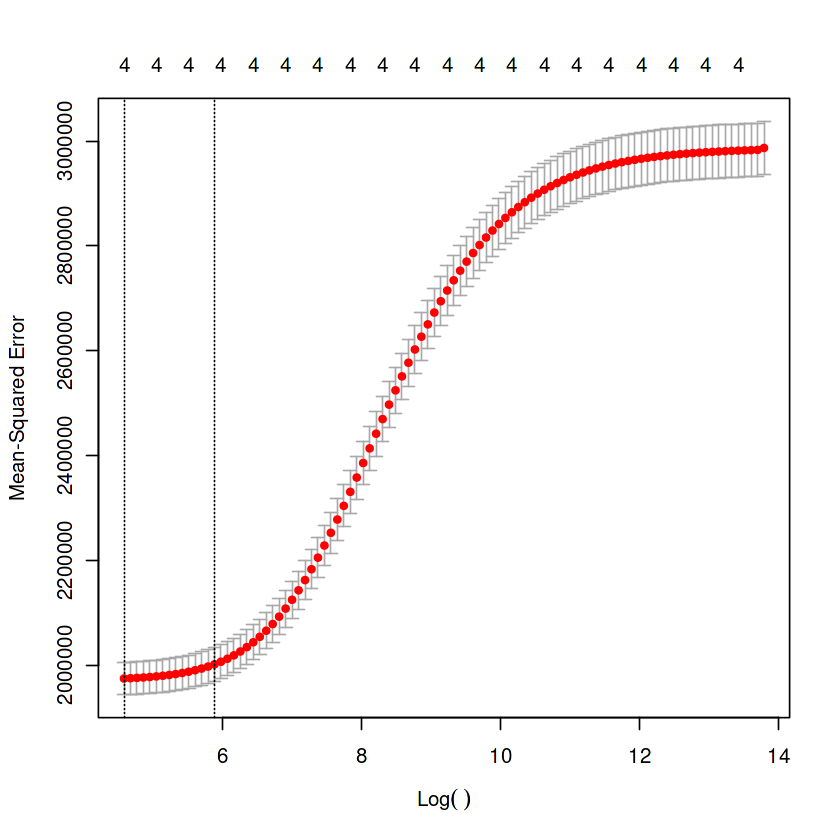

In [19]:
coefficients <- coef(best_model)
print("Coefficients at optimal lambda:")
print(coefficients)

plot(cv_model)

The variables Product_Weight, Visibility_Index, Product_Price, and Store_Established_Year have non-zero coefficients indicating they are important predictors.

Variables such as Energy_Efficiency, Product_Category, Store_ID, Store_Size, Location_Type, and Store_Type have been regularized out (shrunk to zero) indicating they are not important predictors.

The non-zero coefficients (e.g., Visibility_Index = -4539.37) indicate that these variables are important predictors, but their magnitudes are reduced to control model complexity.

This balance minimizes overfitting while maintaining predictive power, as shown in the cross-validation plot.

## Lasso Regression

Lasso regression is similar to Ridge Regression except that instead of L2 regularization, it employs L1 regularization to address the very same issues that Ridge Regression addresses. 

There are however, a couple of differences between the two. The first and most obvious being that since Lasso Regression implements L1 regularization, the penalty term in this case is proportional to the absolute value of the coefficient. 

Another point to note is that unlike its Ridge counterpart, Lasso Regression can push some coefficients to exactly 0. This effectively drops the feature from the predictive model (Similar to how we drop values through visual analysis). Lasso Regression can thus be used effectively for Feature Selection as well.

**1)** Write code to build a Lasso Regression model similar to how you built the Ridge Regression model. This time incorporate hyperparameter tuning right away. So first print the optimal lambda value.                  (2 marks)

In [20]:
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1)

best_lasso_lambda <- cv_lasso$lambda.min
print(best_lasso_lambda)

best_lasso_model <- glmnet(x_train, y_train, alpha = 1, lambda = best_lasso_lambda)
coef(best_lasso_model)

Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

[1] 3.677406


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


11 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)              115.346740
Product_Weight            -1.038031
Energy_Efficiency          .       
Visibility_Index       -4721.682760
Product_Category           .       
Product_Price             15.657516
Store_ID                   .       
Store_Established_Year    13.438480
Store_Size                 .       
Location_Type              .       
Store_Type                 .       

**2)** Display the coefficients of all the variables. Do you notice some variables being dropped out? Which ones are they?   (1 mark)

[1] "Coefficients at optimal lambda:"
11 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)              115.346740
Product_Weight            -1.038031
Energy_Efficiency          .       
Visibility_Index       -4721.682760
Product_Category           .       
Product_Price             15.657516
Store_ID                   .       
Store_Established_Year    13.438480
Store_Size                 .       
Location_Type              .       
Store_Type                 .       


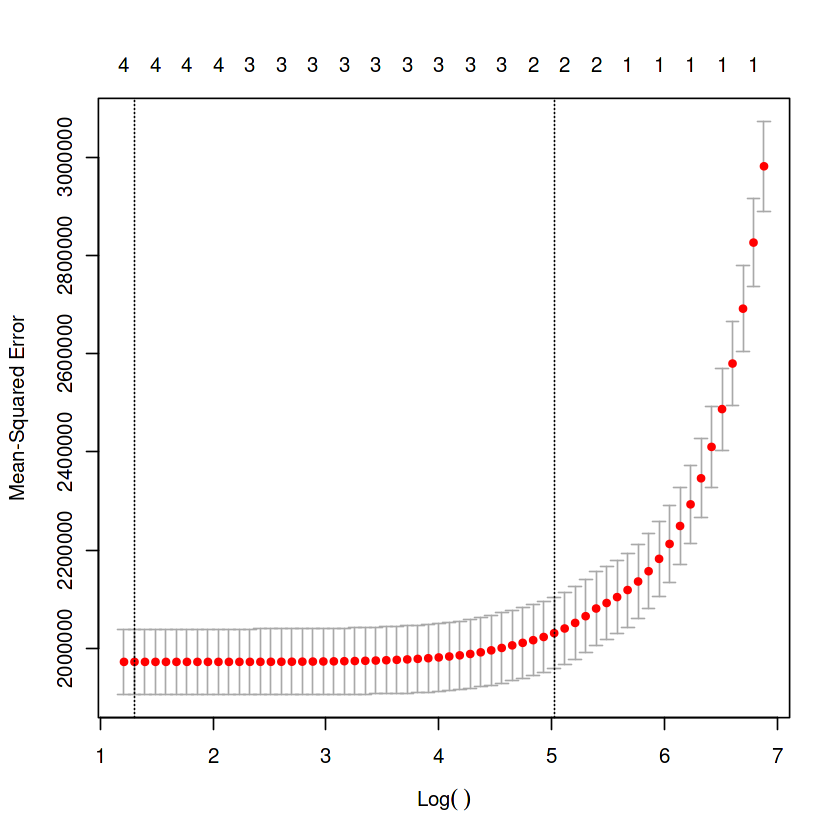

In [21]:
coefficients <- coef(best_lasso_model)
print("Coefficients at optimal lambda:")
print(coefficients)

plot(cv_lasso)

No other variables have been dropped out. Coefficients are also similar to ridge regression.

## Elastic Net Regression

Elastic Net regression, an advanced form of linear regression, combines the benefits of L1 (Lasso) and L2 (Ridge) regularization methods. By integrating both penalty terms, Elastic Net overcomes the limitations of each, offering resilience against multicollinearity, aiding feature selection, and preventing overfitting. 

This approach makes Elastic Net a very versatile approach for achieving accurate and efficient models by finding a middle ground between dropping parameters and retaining important predictors. 

**1)** Build your Elastic Net Regression model incorporating all the steps we previously followed for ridge and lasso regression. (Play around with the alpha value and find out how it affects the model)            (2 marks)



Training Elastic Net with alpha = 0 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Optimal lambda for Elastic Net (alpha = 0 ): 97.67512 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


[1] "Coefficients at optimal lambda (Elastic Net Regression):"
11 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)              224.445976
Product_Weight            -1.546382
Energy_Efficiency          .       
Visibility_Index       -4539.368712
Product_Category           .       
Product_Price             14.877235
Store_ID                   .       
Store_Established_Year    13.106636
Store_Size                 .       
Location_Type              .       
Store_Type                 .       

Training Elastic Net with alpha = 0.05 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Optimal lambda for Elastic Net (alpha = 0.05 ): 10.42525 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


[1] "Coefficients at optimal lambda (Elastic Net Regression):"
11 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)              128.319177
Product_Weight            -1.779089
Energy_Efficiency          .       
Visibility_Index       -4764.915260
Product_Category           .       
Product_Price             15.619484
Store_ID                   .       
Store_Established_Year    13.763465
Store_Size                 .       
Location_Type              .       
Store_Type                 .       

Training Elastic Net with alpha = 0.25 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Optimal lambda for Elastic Net (alpha = 0.25 ): 7.669609 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


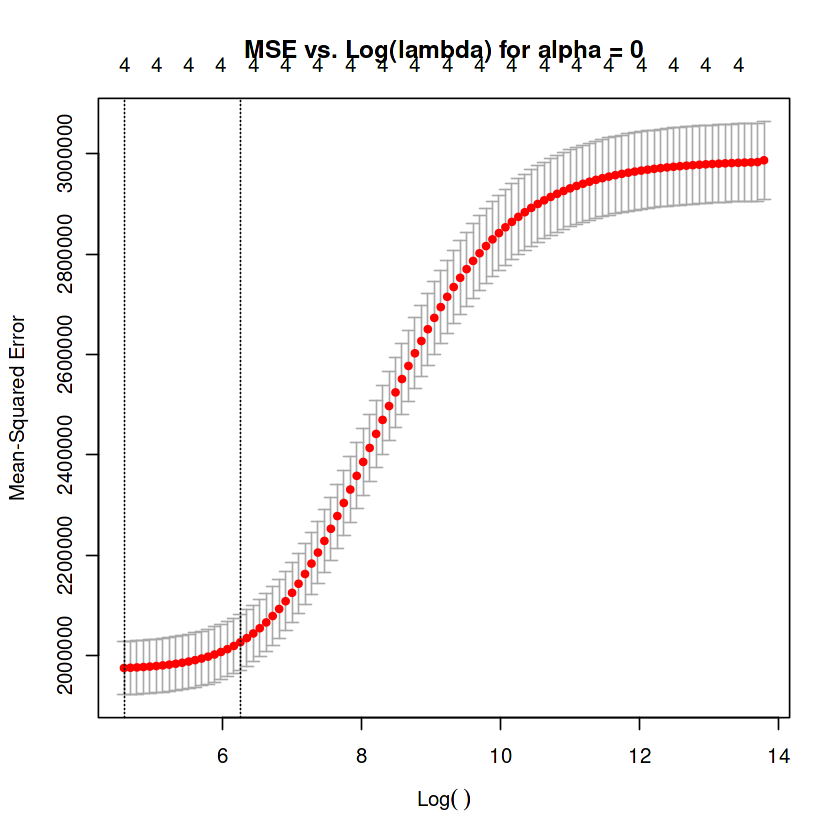

[1] "Coefficients at optimal lambda (Elastic Net Regression):"
11 x 1 sparse Matrix of class "dgCMatrix"
                                 s0
(Intercept)              122.862987
Product_Weight            -1.451353
Energy_Efficiency          .       
Visibility_Index       -4745.210396
Product_Category           .       
Product_Price             15.634189
Store_ID                   .       
Store_Established_Year    13.618233
Store_Size                 .       
Location_Type              .       
Store_Type                 .       

Training Elastic Net with alpha = 0.5 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Optimal lambda for Elastic Net (alpha = 0.5 ): 6.106094 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


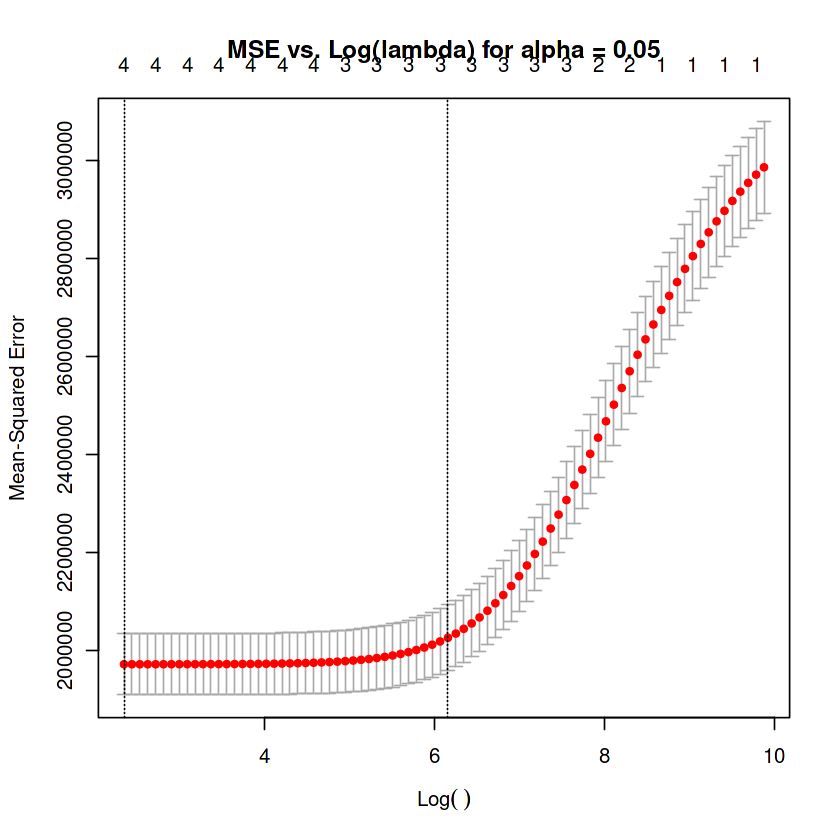

[1] "Coefficients at optimal lambda (Elastic Net Regression):"
11 x 1 sparse Matrix of class "dgCMatrix"
                                s0
(Intercept)              119.18920
Product_Weight            -1.18082
Energy_Efficiency          .      
Visibility_Index       -4727.18740
Product_Category           .      
Product_Price             15.64008
Store_ID                   .      
Store_Established_Year    13.49375
Store_Size                 .      
Location_Type              .      
Store_Type                 .      

Training Elastic Net with alpha = 0.75 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Optimal lambda for Elastic Net (alpha = 0.75 ): 9.403912 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


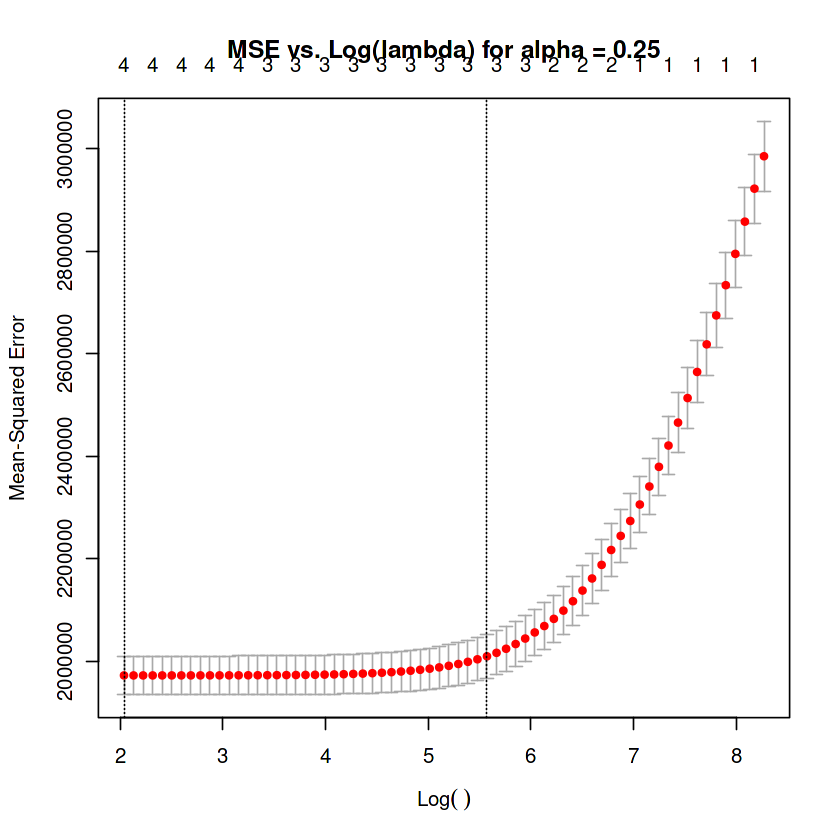

[1] "Coefficients at optimal lambda (Elastic Net Regression):"
11 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)              116.4006289
Product_Weight            -0.1899645
Energy_Efficiency          .        
Visibility_Index       -4638.6839217
Product_Category           .        
Product_Price             15.5813519
Store_ID                   .        
Store_Established_Year    12.9791908
Store_Size                 .        
Location_Type              .        
Store_Type                 .        

Training Elastic Net with alpha = 1 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by coercion”
Warning message in cbind2(1, newx) %*% nbeta:
“NAs introduced by co

Optimal lambda for Elastic Net (alpha = 1 ): 7.052934 


Warning message in storage.mode(xd) <- "double":
“NAs introduced by coercion”


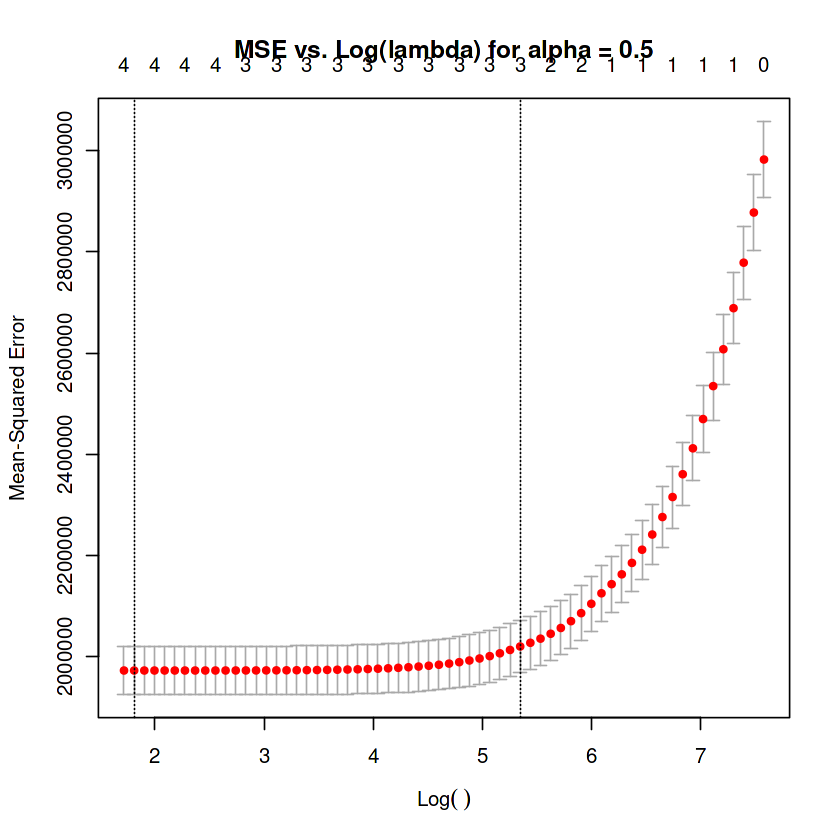

[1] "Coefficients at optimal lambda (Elastic Net Regression):"
11 x 1 sparse Matrix of class "dgCMatrix"
                                  s0
(Intercept)              113.6755032
Product_Weight            -0.1982168
Energy_Efficiency          .        
Visibility_Index       -4645.2059569
Product_Category           .        
Product_Price             15.6025303
Store_ID                   .        
Store_Established_Year    12.9985307
Store_Size                 .        
Location_Type              .        
Store_Type                 .        


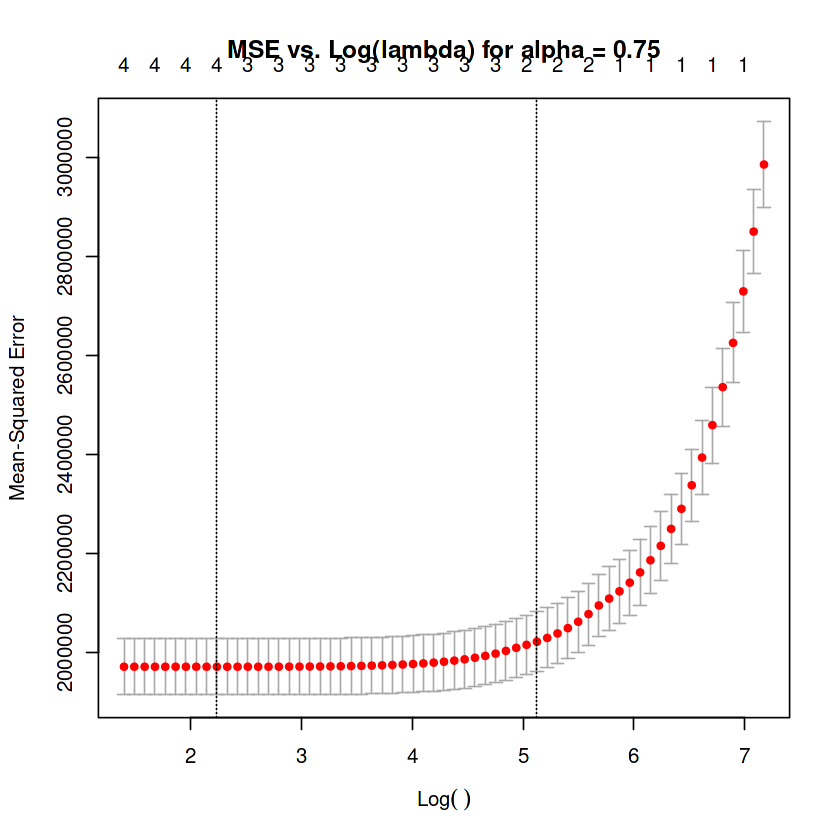

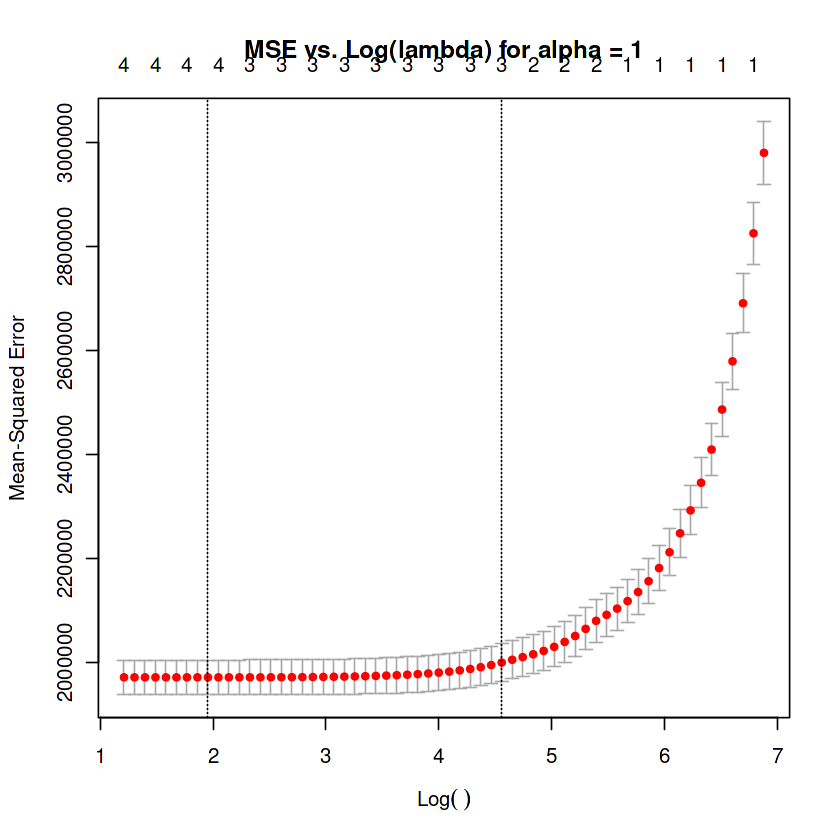

In [22]:
## Write your code here

train_elastic_net <- function(alpha_value) {
  cat("\nTraining Elastic Net with alpha =", alpha_value, "\n")
  
  cv_elastic_net <- cv.glmnet(x_train, y_train, alpha = alpha_value)

  optimal_lambda <- cv_elastic_net$lambda.min
  cat("Optimal lambda for Elastic Net (alpha =", alpha_value, "):", optimal_lambda, "\n")

  final_model <- glmnet(x_train, y_train, alpha = alpha_value, lambda = optimal_lambda)

  coefficients <- coef(final_model)
  print("Coefficients at optimal lambda (Elastic Net Regression):")
  print(coefficients)
  
  plot(cv_elastic_net, main = paste("MSE vs. Log(lambda) for alpha =", alpha_value))
}

alpha_values <- c(0, 0.05, 0.25, 0.5, 0.75, 1)

for (alpha_value in alpha_values) {
  train_elastic_net(alpha_value)
}

Identify and list the variables that have been dropped in the Elastic Net model. How does this compare to the variables dropped in the Lasso model? <br>
What does that tell you about the number of hyperparameters in Elastic Net Regression compared to the other two models?

No variables have been dropped in the Elastic Net model.